# Q3 Fare Frenzy: Understanding fare, tips, and customer behavior (15 Marks)
## Fare and Tips Overview
**Description:** Examine the relationship between fare, tips, and payment behavior, analyzing any patterns or anomalies. This section should help understand customer behavior and fare distribution.


In [25]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData_fixed.csv')

### 3.a Fare and Tip Distribution (4 Marks):

(a) Create histograms and box plots for both fare and tip amounts.


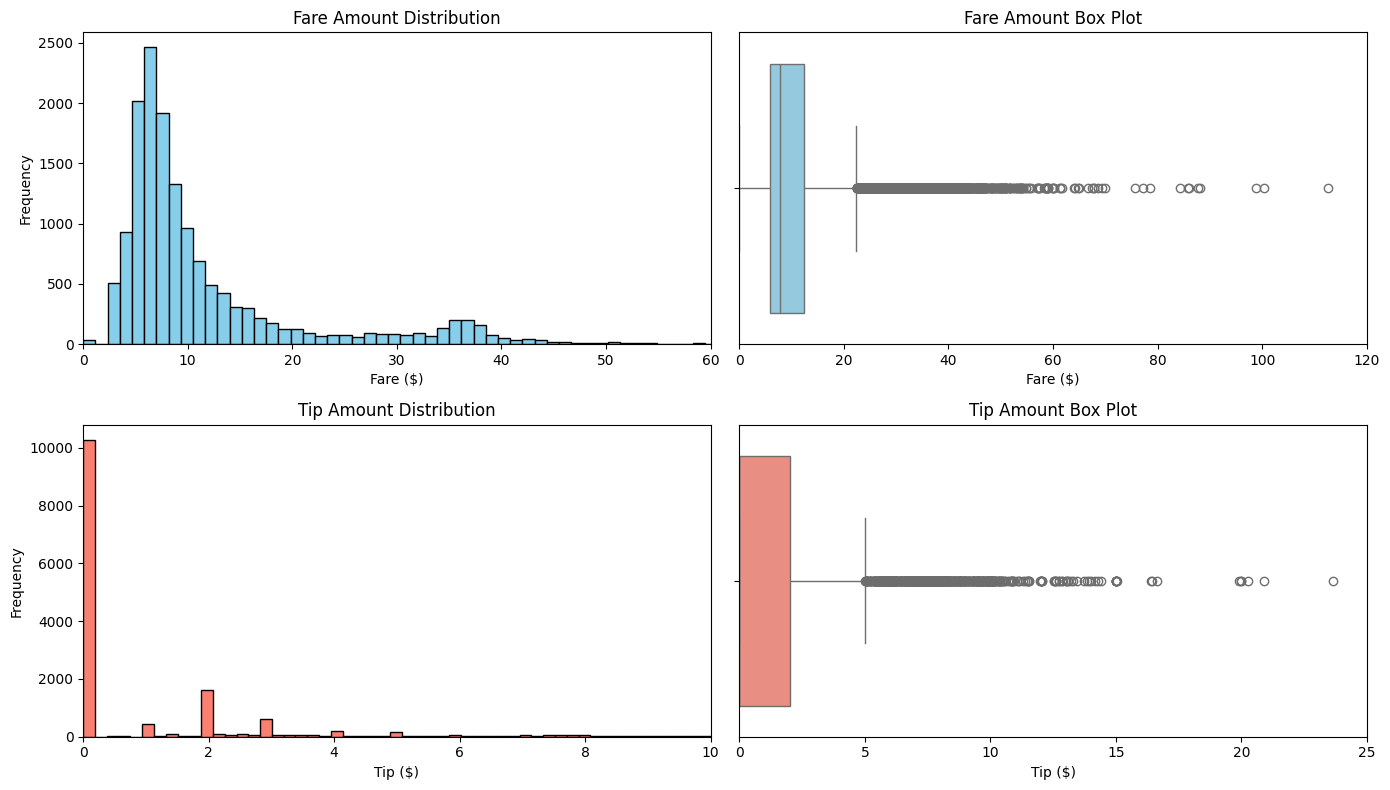

In [26]:
plt.figure(figsize=(14, 8))

# Histogram and Box plot for Fare
plt.subplot(2, 2, 1)
plt.hist(df['fare'], bins=600, color='skyblue', edgecolor='black')
plt.xlim(0, 60)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['fare'], color='skyblue')
plt.xlim(0, 120)
plt.title('Fare Amount Box Plot')
plt.xlabel('Fare ($)')

# Histogram and Box plot for Tip
plt.subplot(2, 2, 3)
plt.hist(df['tips'], bins=250, color='salmon', edgecolor='black')
plt.xlim(0, 10)
plt.title('Tip Amount Distribution')
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['tips'], color='salmon')
plt.xlim(0, 25)
plt.title('Tip Amount Box Plot')
plt.xlabel('Tip ($)')


plt.tight_layout()
plt.show()




(b) Identify the range, outliers, and any clusters in the data.


In [27]:

# Identify the range, outliers, and clusters in the data
fare_range = (df['fare'].min(), df['fare'].max())
tip_range = (df['tips'].min(), df['tips'].max())

# Identifying outliers using the IQR method
fare_q1 = df['fare'].quantile(0.25)
fare_q3 = df['fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1
fare_outliers = df[(df['fare'] < (fare_q1 - 1.5 * fare_iqr)) | (df['fare'] > (fare_q3 + 1.5 * fare_iqr))]

tip_q1 = df['tips'].quantile(0.25)
tip_q3 = df['tips'].quantile(0.75)
tip_iqr = tip_q3 - tip_q1
tip_outliers = df[(df['tips'] < (tip_q1 - 1.5 * tip_iqr)) | (df['tips'] > (tip_q3 + 1.5 * tip_iqr))]


# Statistical summary and interpretation
fare_summary = {
    'mean': df['fare'].mean(),
    'median': df['fare'].median(),
    'std_dev': df['fare'].std()
}
tip_summary = {
    'mean': df['tips'].mean(),
    'median': df['tips'].median(),
    'std_dev': df['tips'].std()
}

print("Fare Summary:", fare_summary)
print("Tip Summary:", tip_summary)
print("Fare Range:", fare_range)
print("Tip Range:", tip_range)
print("Number of Fare Outliers:", len(fare_outliers))
print("Number of Tip Outliers:", len(tip_outliers))

Fare Summary: {'mean': np.float64(11.768216237834956), 'median': np.float64(7.85), 'std_dev': np.float64(11.538850470754118)}
Tip Summary: {'mean': np.float64(1.0766744434075457), 'median': np.float64(0.0), 'std_dev': np.float64(2.1583404234827888)}
Fare Range: (np.float64(0.0), np.float64(700.07))
Tip Range: (np.float64(0.0), np.float64(47.0))
Number of Fare Outliers: 1872
Number of Tip Outliers: 839



(c) Interpretation: Provide a statistical summary(mean, median, standard deviation,), and analyze any patterns in fare and tipping  behavior, such as outliers or clusters in high or low values.

### 3.b Payment Method Insights (3 Marks):

(a) Visualize the frequency of each payment method using bar charts or pie charts.


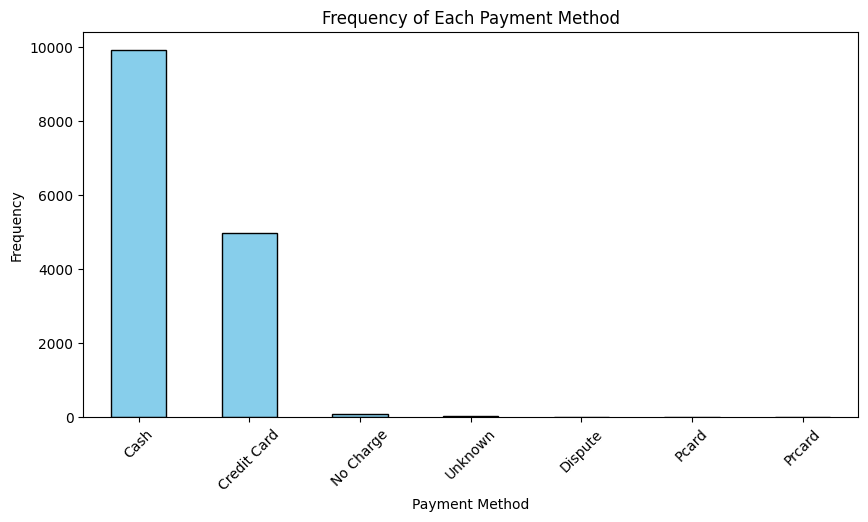

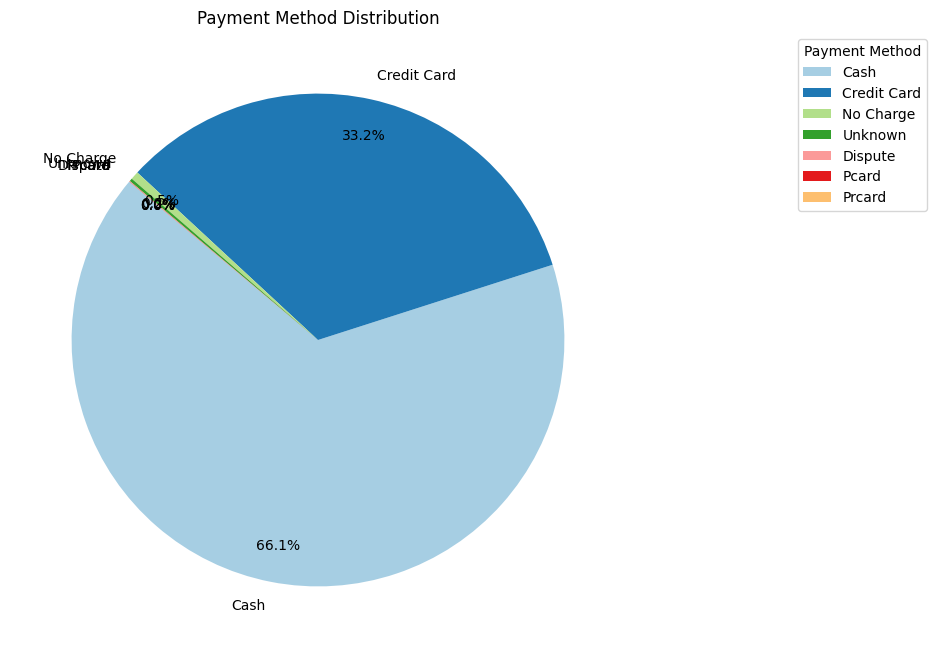

In [28]:
payment_counts = df['payment_type'].value_counts()

# Bar Chart
plt.figure(figsize=(10, 5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, labeldistance=1.1, pctdistance=0.85, textprops={'fontsize': 10})
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Payment Method Distribution')
plt.ylabel('')  # Hide y-axis label for better visual
plt.show()


(b) Interpretation: Identify any dominant payment methods and discuss how this may impact service providers

### 3.c Tips by Payment Method (3 Marks):

(a) Create a box plot to compare tips across different payment methods.

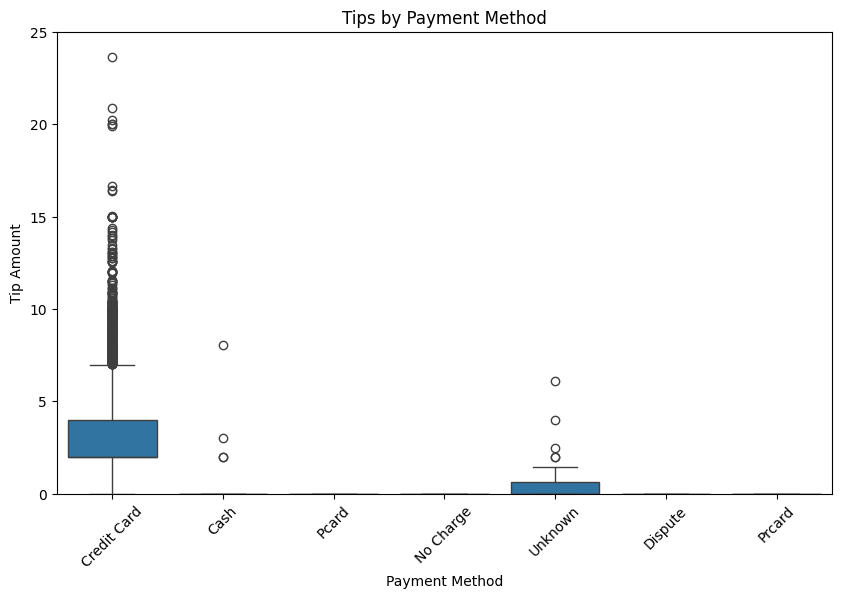

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='tips', data=df)
plt.ylim(0, 25)
plt.title('Tips by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.xticks(rotation=45)
plt.show()

(b) Interpretation: Summarize the average tipping amounts for each method and analyze variations.

In [30]:
tip_summary = df.groupby('payment_type')['tips'].describe()
print(tip_summary)

               count      mean       std  min  25%  50%   75%    max
payment_type                                                        
Cash          9909.0  0.001519  0.090851  0.0  0.0  0.0  0.00   8.05
Credit Card   4975.0  3.239668  2.649012  0.0  2.0  2.0  4.00  47.00
Dispute          4.0  0.000000  0.000000  0.0  0.0  0.0  0.00   0.00
No Charge       81.0  0.000000  0.000000  0.0  0.0  0.0  0.00   0.00
Pcard            3.0  0.000000  0.000000  0.0  0.0  0.0  0.00   0.00
Prcard           1.0  0.000000       NaN  0.0  0.0  0.0  0.00   0.00
Unknown         29.0  0.685172  1.436010  0.0  0.0  0.0  0.65   6.10


### 3.d Fare vs. Distance (5 Marks):

(a) Plot a scatter plot showing the relationship between trip distance and fare.

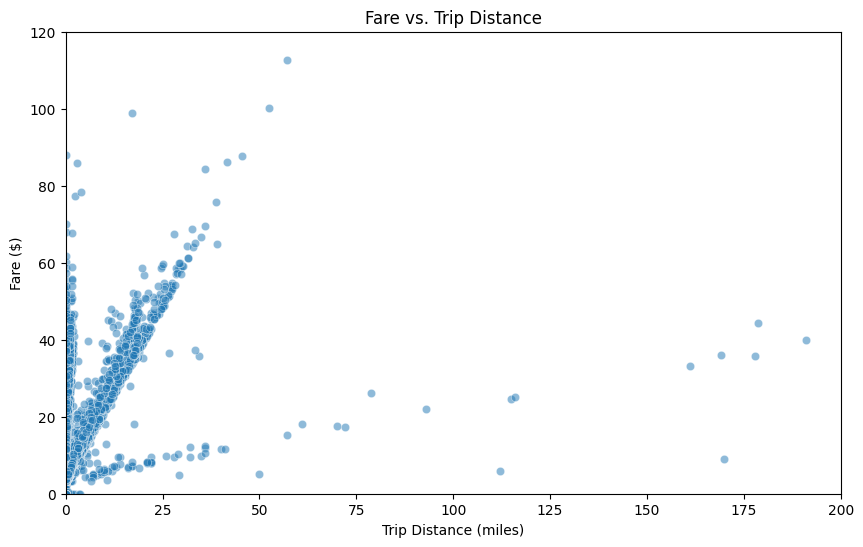

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=df, alpha=0.5)
# It has outliers, so we limit the x and y axis
plt.xlim(0, 200)
plt.ylim(0, 120)
plt.title('Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.show()

(b) Calculate and interpret the correlation coefficient between the two variables.

In [32]:
correlation_coefficient = np.corrcoef(df['trip_miles'], df['fare'])[0, 1]
print(f"Correlation coefficient between fare and trip distance: {correlation_coefficient:.2f}")

Correlation coefficient between fare and trip distance: 0.22


(c) Interpretation: Explain any findings on the fare-distance relationship and outline any potential implications for fare pricing.

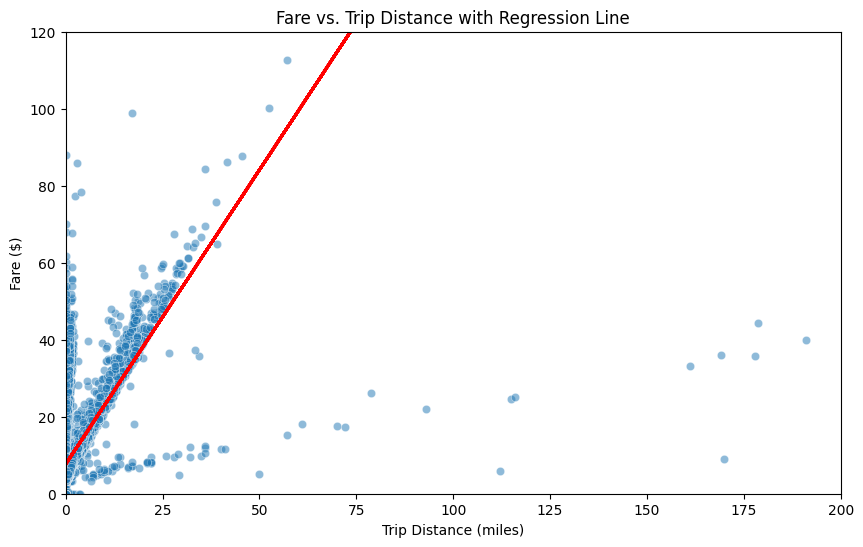

In [33]:
from sklearn.linear_model import LinearRegression
#remove outliers
df_new = df[(df['fare'] < 80) & (df['trip_miles'] < 50)]
model = LinearRegression()
model.fit(df_new[['trip_miles']], df_new['fare'])
intercept = model.intercept_
slope = model.coef_[0]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=df, alpha=0.5)
plt.xlim(0, 200)
plt.ylim(0, 120)
plt.plot(df['trip_miles'], intercept + slope * df['trip_miles'], color="red", linewidth=2)
plt.title('Fare vs. Trip Distance with Regression Line')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.show()